In [99]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [100]:
bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0)

#read sterbefälle pro monat
sterbefälle_monat = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_groß.xlsx", sheet_name='D_2016-2022_Monate_AG_Ins') #Datensatz ist selbst zusammengebaut
sterbefälle_monat = sterbefälle_monat[sterbefälle_monat.columns].replace(["-",".","X "],0)
sterbefälle_monat

,Nr.,Jahr,Alter,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,35,2020,Insgesamt,84980,80030,87396,83830,75835,72159,73795,78742,74243,79781,85989,108792,985572
1,36,2020,0-15,272,291,313,289,277,275,278,273,277,260,240,261,3306
2,37,2020,15-30,329,330,320,288,311,329,335,357,305,320,309,311,3844
3,38,2020,30-35,248,191,229,221,199,213,249,204,224,206,197,226,2607
4,39,2020,35-40,374,330,332,345,346,308,336,316,318,326,328,402,4061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,387,2000,75-80,12695,11668,10979,10282,10020,9795,9784,9956,9537,10346,10313,10911,126286
353,388,2000,80-85,10350,9692,8954,8351,8124,7919,8018,7948,7977,8702,8806,9370,104211
354,389,2000,85-90,15951,14812,13574,12355,11838,11343,11402,11365,11133,11863,12123,12829,150588
355,390,2000,90-95,9386,8742,7715,7130,6838,6863,6655,6894,6652,7409,7617,8126,90027


In [101]:
#Sterbefälle einteilen
#bildet summe aus gruppe 90-95 und gruppe ü 95, ersetzt die 90-95 row damit, benennt sie um und dropt die ü95 reihe.
new_row = (sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="90-95"]) + (sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="95 u. mehr"])
age_90_95 = sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="90-95"]
mehr_95 = sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="95 u. mehr"]

new_row = age_90_95.iloc[0,3:] + mehr_95.iloc[0,3:]
index_95 = list(age_90_95.index)
index_mehr = list(mehr_95.index)

for i in range (len(index_95)):
    new_row = age_90_95.iloc[i,3:] +mehr_95.iloc[i,3:]
    sterbefälle_monat.loc[index_95[i], "Januar":] = new_row
    sterbefälle_monat.drop(index_mehr[i], inplace=True)


sterbefälle_monat['Alter'].replace({'90-95': '90<'}, inplace = True)
sterbefälle_monat = sterbefälle_monat.rename(columns={'Januar': 1,'Februar': 2,'März': 3,'April': 4,'Mai': 5,'Juni': 6,'Juli': 7,'August': 8,'September': 9,'Oktober': 10,'November': 11,'Dezember': 12})


In [102]:
print(sterbefälle_monat.loc[sterbefälle_monat["Jahr"]==2020])
#print(sterbefälle_monat)

    Nr.  Jahr      Alter      1      2      3      4      5      6      7  \
0    35  2020  Insgesamt  84980  80030  87396  83830  75835  72159  73795   
1    36  2020       0-15    272    291    313    289    277    275    278   
2    37  2020      15-30    329    330    320    288    311    329    335   
3    38  2020      30-35    248    191    229    221    199    213    249   
4    39  2020      35-40    374    330    332    345    346    308    336   
5    40  2020      40-45    486    458    508    504    497    469    458   
6    41  2020      45-50    856    803    855    859    803    798    791   
7    42  2020      50-55   1943   1697   1878   1714   1737   1645   1710   
8    43  2020      55-60   3159   3002   3158   3029   3005   2902   2937   
9    44  2020      60-65   4414   4166   4454   4213   4150   3914   4107   
10   45  2020      65-70   5820   5520   6089   5638   5382   5155   5271   
11   46  2020      70-75   6653   6224   6893   6603   6134   5905   5895   

In [103]:
#alle Altersgruppen einteilen
rows = []
x = 0
j = 0
for k in range (1 ,32): 
    x=0
    for i in range(0, 92):
        k2 = k*91
        if i == 0 and k == 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[0]]["Gesamt"] #Gesamtbevölkerung je altersgruppe
        if i == 0 and k != 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+(k-1)*92]]["Gesamt"]
        else:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+((k-1)*92)]]["Gesamt"]

        if ( i < 15):
            x += bevölkerungs_anzahl
            if (i == 14):
                rows.append([1990+k-1,"0 - "+"<{}".format(i+1), x])
                x = 0   

        elif (i >= 15 and  i < 30):
    
            x += bevölkerungs_anzahl
            if i == 29:
                rows.append([1990+k-1,(str(i-14)+" - <"+str(i+1)), x])

            
                x = 0

        elif (i >= 30 and  i < 90):
            j += 1
            x += bevölkerungs_anzahl
            if j == 5:
                rows.append([1990+k-1,(str(i-4)+" - <"+str(i+1)), x])
                j = 0
                x = 0

        elif i == 90:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"90=<", x])
            x = 0

        elif i == 91:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"Gesamt", x])
            x=0
       
        

new_df = pd.DataFrame(rows, columns=["Jahr","Alter", "Anzahl"])

In [104]:
standard_bevölkerung = new_df.loc[new_df["Jahr"]==2020]
standard_bevölkerung

,Jahr,Alter,Anzahl
480,2020,0 - <15,11477800
481,2020,15 - <30,13340204
482,2020,30 - <35,5581088
483,2020,35 - <40,5290876
484,2020,40 - <45,5034888
485,2020,45 - <50,5035860
486,2020,50 - <55,6487224
487,2020,55 - <60,6817318
488,2020,60 - <65,5818137
489,2020,65 - <70,4899104


In [105]:
#rohe sterberate
#loop über jahre
sterberaten_roh = []
for n in range(0,21):
    z = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020-n)]
    sterberate_gesamt = 0

    gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[15]][2]
    
    #loop über altersgruppen
    for i in range(1,16):
        mri = ((z.loc[z.index[i]]["Insgesamt"]) / gesamt_bev) * 100000  #sterberate je altersgruppe
        sterberate_gesamt += mri 

    

    #print(2020-n, "Roh:", sterberate_jahr)
    sterberaten_roh.append([2020-n, round(sterberate_gesamt,2 )])
    sterberate_gesamt = 0

sterberaten_roh

[[2020, 1185.22],
 [2019, 1129.84],
 [2018, 1148.31],
 [2017, 1121.11],
 [2016, 1095.42],
 [2015, 1112.62],
 [2014, 1044.26],
 [2013, 1074.89],
 [2012, 1045.74],
 [2011, 1024.99],
 [2010, 1032.73],
 [2009, 1027.65],
 [2008, 1015.5],
 [2007, 994.71],
 [2006, 988.07],
 [2005, 998.41],
 [2004, 984.03],
 [2003, 1026.93],
 [2002, 1012.19],
 [2001, 996.38],
 [2000, 1008.71]]

In [106]:
#altersbereinigt
sterberaten_bereinigt = []
#loop über jahre
for n in range(0,21):
    z = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020-n)]
    q = new_df.loc[new_df["Jahr"]==2020-n]
    erg_sum = 0
    gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[15]][2]

    #loop über wochen

    sum = 0
    #loop über Altersgruppen
    for i in range(1,16):

        asx = standard_bevölkerung.loc[standard_bevölkerung.index[i]][2] #bevölkerung je altersgruppe Standardbevölkerung
        bevölkerung_grp = q.loc[q.index[i]][2] #größe Bevölkerungsruppe untersuchte Bevölkerung
        subx = ((z.loc[z.index[i]]["Insgesamt"]) / bevölkerung_grp) * 100000 #sterberate je altersgruppe
        
        sum += (asx * subx)    
        

    erg = sum / gesamt_bev
    erg_sum += erg

    #print(2020-n, "Altersbereinigt:",erg_sum)
    sterberaten_bereinigt.append([2020-n, erg_sum])

sterberaten_bereinigt

[[2020, 1185.2223348939644],
 [2019, 1153.487629343934],
 [2018, 1201.993299315672],
 [2017, 1192.8410051402022],
 [2016, 1185.3427249856886],
 [2015, 1228.7261311632426],
 [2014, 1181.278062614641],
 [2013, 1247.7715959394989],
 [2012, 1233.590972872587],
 [2011, 1236.4141345853484],
 [2010, 1237.3042842079394],
 [2009, 1278.8992469205773],
 [2008, 1288.9821099823923],
 [2007, 1264.5246964293092],
 [2006, 1270.1336245930704],
 [2005, 1317.0019118498801],
 [2004, 1352.5543556248485],
 [2003, 1431.6752214355818],
 [2002, 1393.5297427966325],
 [2001, 1382.556033779675],
 [2000, 1445.0263790648735]]

In [107]:
sterberaten_roh = pd.DataFrame(sterberaten_roh, columns=["Jahr", "Sterberate"])
sterberaten_bereinigt = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate"])

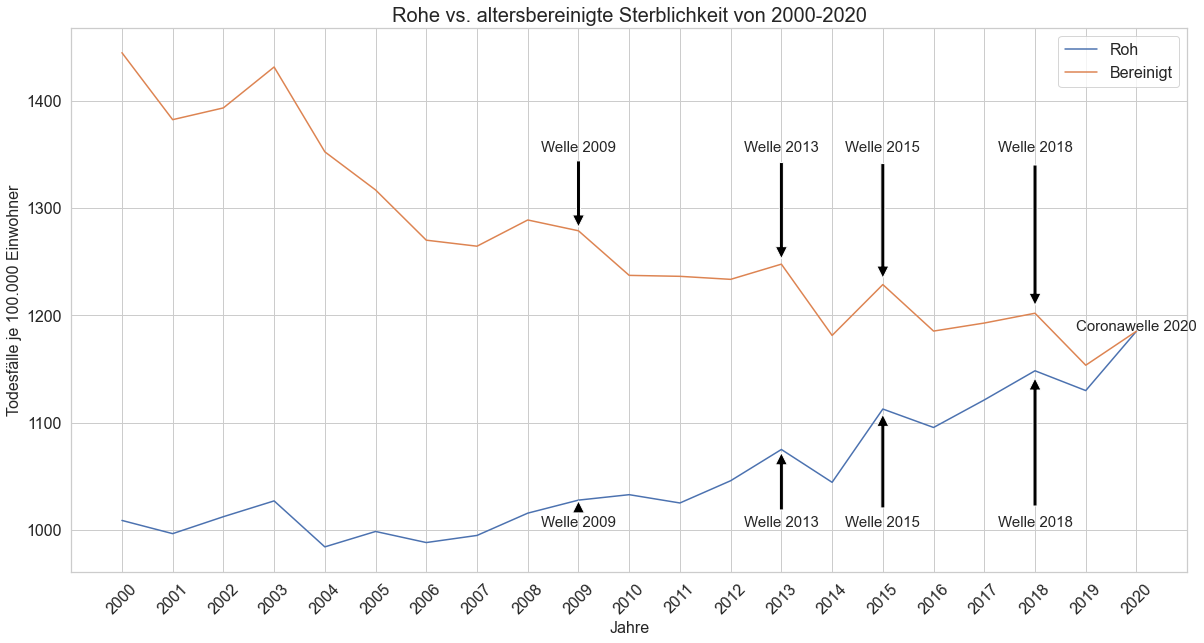

In [108]:
xticks = [i for i in range(2000,2021)]

ax = sns.lineplot(x="Jahr",  y='Sterberate', data=sterberaten_roh)
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate', data=sterberaten_bereinigt)
plt.legend(labels=['Roh','Bereinigt'],fontsize= 16)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)

# annotate lines
grippe_wellen = [2009,2013,2015,2018,2020]

for weave in grippe_wellen:
    sel_year_raw = sterberaten_roh.loc[sterberaten_roh["Jahr"] == weave]
    raw_year = sel_year_raw.Jahr
    raw_death = sel_year_raw.Sterberate

    sel_year_cleaned = sterberaten_bereinigt.loc[sterberaten_bereinigt["Jahr"] == weave]
    cleaned_year = sel_year_cleaned.Jahr
    cleaned_death = sel_year_cleaned.Sterberate
    if  weave == 2020:
     ax.annotate("Coronawelle " + str(weave), xy=(raw_year, raw_death),xycoords='data', size = 15,ha='center')
    else:
        ax.annotate("Welle "+str(weave), xy=(raw_year, raw_death), xycoords='data',xytext=(raw_year, 1000), size = 15,ha='center',arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

        ax.annotate("Welle " +str(weave), xy=(cleaned_year, cleaned_death),xycoords='data',xytext=(cleaned_year, 1350),size = 15, ha='center',arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.set_ylabel("Todesfälle je 100.000 Einwohner", fontsize = 16)
ax.set_xlabel("Jahre", fontsize = 16)
ax.set_title("Rohe vs. altersbereinigte Sterblichkeit von 2000-2020",fontsize = 20)
plt.xticks(range(min(xticks), max(xticks)+1, 1), fontsize=16)
plt.yticks(fontsize=16)
# plt.ylabel("Sterberate je 100.000 Einwohner")
# plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
# plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(20, 10)

In [109]:
sterberaten_roh

,Jahr,Sterberate
0,2020,1185.22
1,2019,1129.84
2,2018,1148.31
3,2017,1121.11
4,2016,1095.42
5,2015,1112.62
6,2014,1044.26
7,2013,1074.89
8,2012,1045.74
9,2011,1024.99


In [164]:
cmr_df = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate"])
cmr_df["cmr"] = 0 # Damit Colum erzeugt wird
for i in range (len(cmr_df)):
    cmr_df["cmr"][i] = cmr_df["Sterberate"][i]/sterberaten_roh["Sterberate"][i]
cmr_df

C:\Users\mikes\AppData\Local\Temp\ipykernel_22456\3619147225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmr_df["cmr"][i] = cmr_df["Sterberate"][i]/sterberaten_roh["Sterberate"][i]


,Jahr,Sterberate,cmr
0,2020,1185.222335,1.000002
1,2019,1153.487629,1.020930
2,2018,1201.993299,1.046750
3,2017,1192.841005,1.063982
4,2016,1185.342725,1.082090
5,2015,1228.726131,1.104354
6,2014,1181.278063,1.131211
7,2013,1247.771596,1.160837
8,2012,1233.590973,1.179634
9,2011,1236.414135,1.206269


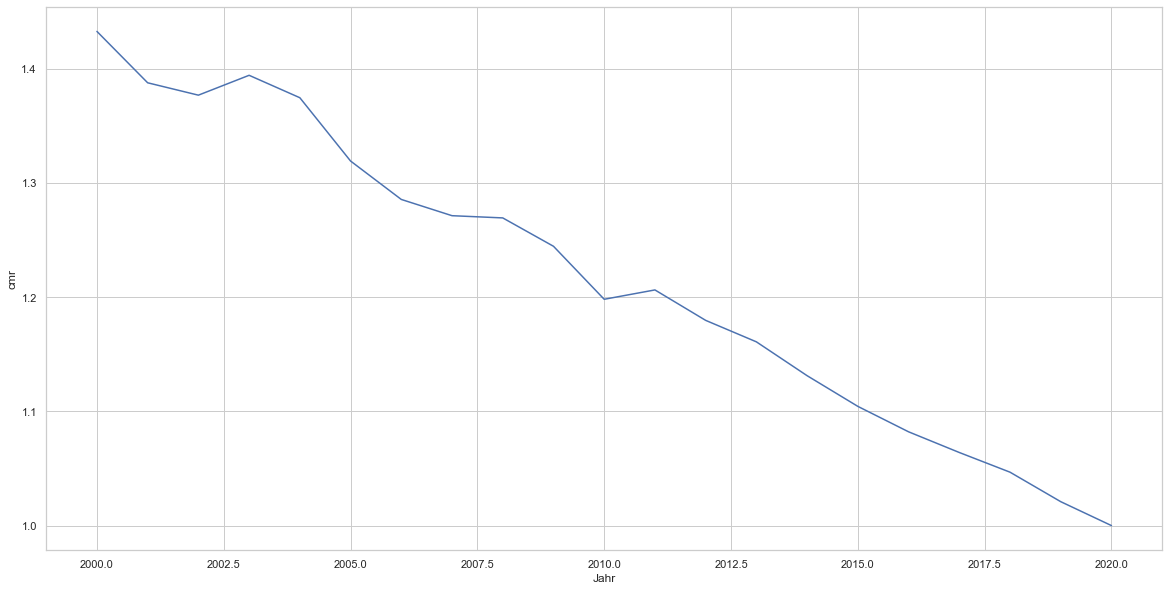

In [136]:
ax = sns.lineplot(x="Jahr",  y='cmr', data=cmr_df)
plt.gcf().set_size_inches(20, 10)

In [159]:
#Berechnung des Trendes
trend_area = cmr_df.loc[(cmr_df.Jahr >= 2017)]
trend_area = trend_area.sort_values(by="Jahr")
trend_area = trend_area.reset_index(drop=True)
trend_area

,Jahr,Sterberate,cmr
0,2017.0,1192.841005,1.063982
1,2018.0,1201.993299,1.046750
2,2019.0,1153.487629,1.020930
3,2020.0,1185.222335,1.000002
4,2021.0,1161.413943,0.979912


In [160]:
##Erstellen der Trendline
coeff = np.polyfit(trend_area.Jahr, trend_area.cmr ,1) # 1 = linear
m = coeff[0]
b = coeff[1]
print(m, b)

-0.02148875227794971 44.40810610904341


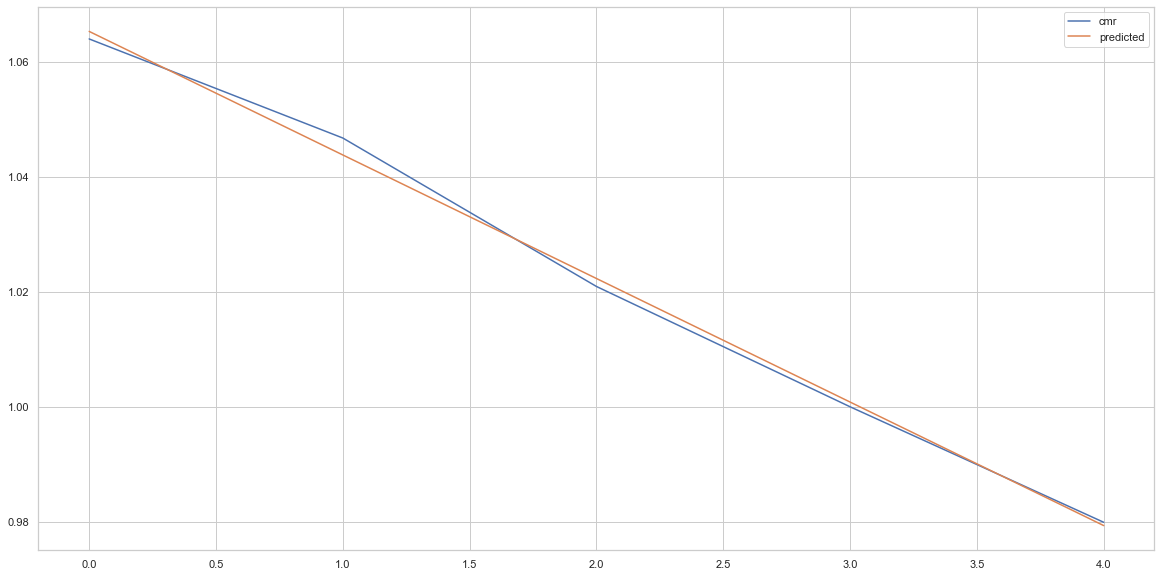

In [161]:
trend_area['predicted'] = pd.Series(np.polyval(coeff, trend_area.Jahr))

trend_area[['cmr', 'predicted']].plot()
plt.gcf().set_size_inches(20, 10)

In [165]:
cmr_df.loc[-1] = [2021, np.polyval(coeff, 2021)* cmr_df.loc[(cmr_df["Jahr"]==2020)]["Sterberate"][0], np.polyval(coeff, 2021)]  # adding a row
cmr_df.index = cmr_df.index + 1  # shifting index
cmr_df.sort_index(inplace=True)
print(cmr_df)

      Jahr   Sterberate       cmr
0   2021.0  1160.732981  0.979338
1   2020.0  1185.222335  1.000002
2   2019.0  1153.487629  1.020930
3   2018.0  1201.993299  1.046750
4   2017.0  1192.841005  1.063982
5   2016.0  1185.342725  1.082090
6   2015.0  1228.726131  1.104354
7   2014.0  1181.278063  1.131211
8   2013.0  1247.771596  1.160837
9   2012.0  1233.590973  1.179634
10  2011.0  1236.414135  1.206269
11  2010.0  1237.304284  1.198091
12  2009.0  1278.899247  1.244489
13  2008.0  1288.982110  1.269308
14  2007.0  1264.524696  1.271250
15  2006.0  1270.133625  1.285469
16  2005.0  1317.001912  1.319099
17  2004.0  1352.554356  1.374505
18  2003.0  1431.675221  1.394131
19  2002.0  1393.529743  1.376747
20  2001.0  1382.556034  1.387579
21  2000.0  1445.026379  1.432549
